<a href="https://colab.research.google.com/github/DonnaVakalis/Personal/blob/master/DJW_slack_word.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For the code in this notebook, I am indebted to:


*   https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/
*   https://stackoverflow.com/questions/56866697/python-read-json-files-from-all-sub-directories
*   https://www.datacamp.com/community/tutorials/wordcloud-python






 

In [0]:
# IMPORTS

import os
import glob
import pandas as pd
from pathlib import Path
import numpy as np

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [3]:
# MOUNT GOOGLE DRIVE

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# LOCATE RAW DATA FILES
os.chdir("/content/gdrive/My Drive/RawDat/Slack_export_June8")
working_directory = os.getcwd()
 
sub_directories = [working_directory + "/" + x for x in os.listdir(working_directory) if os.path.isdir(working_directory + "/"+x)]
all_json_files = []

for sub_dir in sub_directories:
    os.chdir(sub_dir)
    for file in glob.glob("*.json"):
        all_json_files.append(sub_dir + "/" + file)

# Get back to original working directory
os.chdir(working_directory)

In [5]:
# temp check
#print(all_json_files)
len(all_json_files) #2457

2457

In [6]:
# LOAD ALL JSON FILES INTO ONE LIST 
data_container = []
counter_totals = 0
counter_failures = 0
for x in all_json_files:
      counter_totals += 1
      try: 
          df = pd.read_json(x)
          data_container.append(df)
      except (ValueError):
          counter_failures += 1
          continue
      
print(counter_totals) # 2457
print(counter_failures) # 2

2457
2


In [0]:
# MAKE THE LIST INTO A DATAFRAME
all_data = pd.concat(data_container)

In [0]:
# MAKE CSV FILE
# writing to csv for quicker startup or offline use later
export_csv = all_data.to_csv (r'/content/gdrive/My Drive/RawDat/pandaresult.csv', index = None, header=True) # path where result file will be stored


In [16]:
 # CHOP TO WHAT's NEEDED
dat = all_data[['user','text']]
dat.head()

,user,text
0,U29BTED6Y,They are getting natural sunlight...but it is ...
1,U29BTED6Y,"Yes, everything I've read says this is an impo..."
2,U29BTED6Y,"I don't disagree with the timing, but I am una..."
3,U29BTED6Y,I appreciate the thought that you have given t...
4,U29C4CFP1,"hm, lets think about this. Maybe we can come u..."


In [0]:
# PRE-PROCESSING

dat['text'] = dat['text'].str.replace('[^\w\s]','') # remove punctuation


In [62]:
# what are the common words 
freq_wrds = pd.Series(' '.join(dat['text']).split()).value_counts()[:180]
freq_wrds

# what are the single-use words 
infreq_wrds = pd.Series(' '.join(dat['text']).split()).value_counts()[-150:]
infreq_wrds

# make a list that excludes the most common and least common words

freq_wrds= list(freq_wrds.index)
dat['text_cleaned']  = dat['text'] .apply(lambda x: " ".join(x for x in x.split() if x not in freq_wrds))

infreq_wrds= list(infreq_wrds.index)
dat['text_cleaned']  = dat['text_cleaned'] .apply(lambda x: " ".join(x for x in x.split() if x not in infreq_wrds))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [63]:
# MAKE A WORD CLOUD

text = " ".join(review for review in dat['text_cleaned'])
print ("There are {} words in the combination of all messages.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=600, width=2000, height=1300).generate(text)
 
# There are 617432 words in the combination of all messages!!!



There are 631040 words in the combination of all messages.


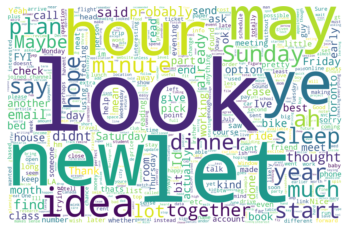

In [64]:
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [65]:
# Save the image in the img folder:
wordcloud.to_file("/content/gdrive/My Drive/RawDat/third_wordCloud180.png") 

In [0]:
# USEFUL CHUNK FOR ALT WAY OF UPLOADING FILE(S)

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))